# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd  #вызываем библиотеку pandas
import matplotlib.pyplot as plt  #вызываем библиотеку matplotlib
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [2]:
#прочитаем и загрузим данные из файла в датафрейм
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#ознакомимся с данными ,выведем первые и последние 5 строчек данных
display(data.head(5))
display(data.tail(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


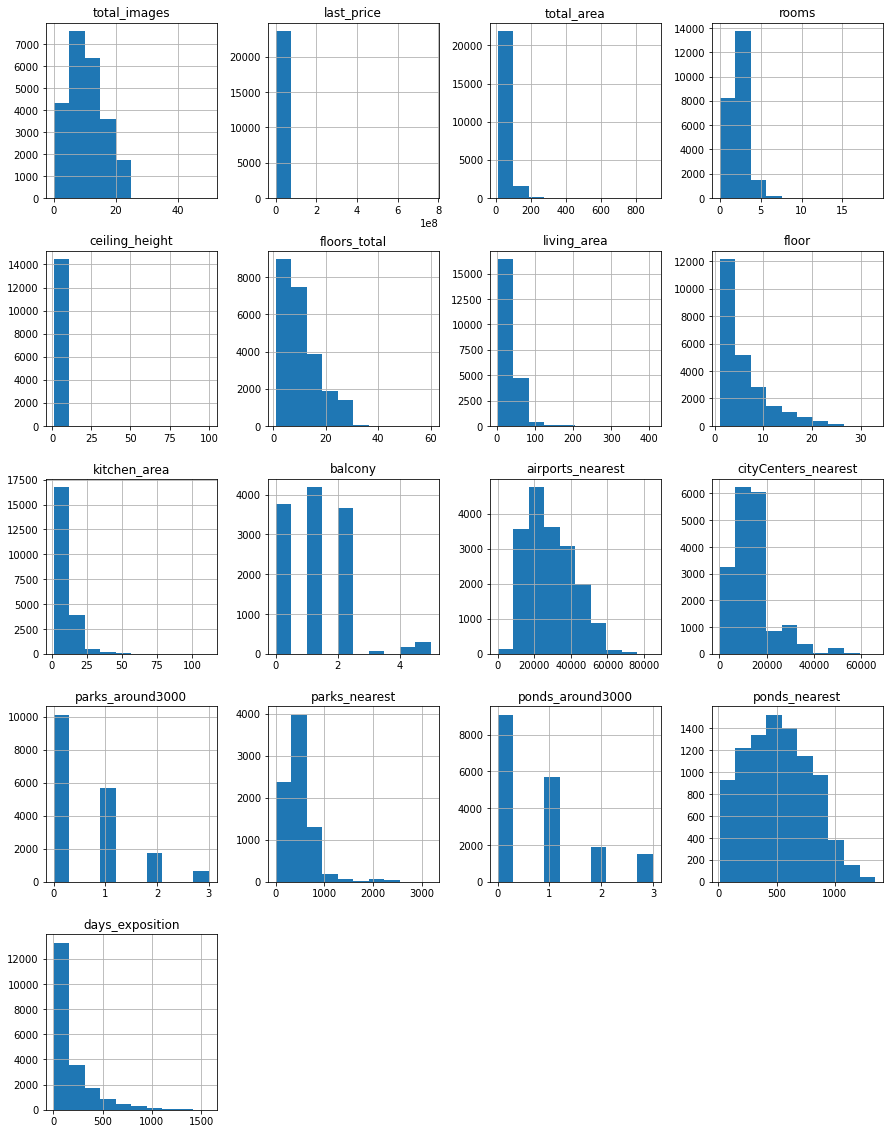

In [4]:
#построим общую гистограмму по всем данным
data.hist(figsize=(15, 20))
plt.show()

При ознакомлении с общей информацией и начальными гистограммами по каждому столбцу заметил следующее:

    floors_total имеет формат вещественного числа типа float64, а должен быть int, так как не может быть количество этажей не целым значением;
    is_apartment имеет тип данных object, хотя должен иметь значения bool - True or False;
    balcony имеет формат вещественного числа типа float64, а должен быть int, так как не может быть количество балконов не целым значением;
    parks_around3000 имеет формат вещественного числа типа float64, а должен быть int, так как не может быть количество парков не целым значением;
    ponds_around3000 имеет формат вещественного числа типа float64, а должен быть int, так как не может быть количество прудов не целым значением;
    days_exposition данный параметр имеет вещественный тип данных float64, не может количество дней быть не целым значением.

### Предобработка данных

In [5]:
#посмотрим есть ли пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что данные не идеальны и есть пропуски.

Много пропусков, но в особенности выделяются столбцы:
         
    ceiling_height - высота потолков; 
    is_apartment - апартаменты; 
    balcony - число балконов; 
    parks_nearest - расстояние до ближайшего парка;
    ponds_nearest - расстояние до ближайшего водоема.
Примерно равно количество пропусков в столбцах:

    airports_nearest - расстояние до ближайшего аэропорта,
    cityCenters_nearest - расстояние до центра города, 
    parks_around3000 - число парков в радиусе 3 км, 
    ponds_around3000 - число водоемов в радиусе 3 км. 
    
Также есть пропущенные значения столбцов:
    
    living_area - жилая площадь,
    kitchen_area - площадь кухни, 
    days_exposition - сколько было размещено объявление от публикации до снятия,
    floors_total - количество этажей в доме, 
    locality_name - название населенного пункта.
    
Проведем предобработку данных и по возможности постараемся заполнить пропущенные значения.

In [6]:
#обработаем данные и заполним пропуски по возможности
#заполним пропущенные значения в данном столбце значением - False
data['is_apartment'] = data['is_apartment'].fillna(False)

#заполним пропущенные значения в данном столбце как отсутсвие балкона, то есть 0
data['balcony'] = data['balcony'].fillna(0)

#заполним пропущенные значения locality_name как unknown
data['locality_name'] = data['locality_name'].fillna('unknown')

#в столбце floors_total отсутсвует значения количества этажей в доме
#данные параметры являются точными и их невозможно заполнить, если только как unknown, но таким образом скорее всего они приведут к погрешностям в анализе
#так как количесвто пропусков по даннону параметру немного - 86, стоит их убрать
data = data.dropna(subset=['floors_total'])

В столбце is_apartment слишком много пропусков для bool значений, видимо данные пропуски не являются апартаментами в следствии чего не указали данный тип/параметр. В столбце balcony не указано число балконов, пользователь видимо не указал данный параметр возможно в следствии отсутствия балконов. В столбцах parks_around3000 и ponds_around3000 много пропущенных значений, возможно данных просто нет, а возможно просто нет ближайших парков и прудов.

Скорее всего пользователь больше обращает внимание на основные параметры недвижимости, такие как: число комнат, жилая площадь, количество этажей в доме, какой этаж, цена.Такие параметры как высота потолков, площадь кухни и наличие балкона обращают внимание реже.

Другие же параметры, такие как: расстояние до ближайшего парка или водоема, количество ближайших парков и водоем, и расстояние до центра города возможно не всегда указываются в картографических данных, да и подбор данных параметров возможно ёмкий процесс.

In [7]:
#рассмотрим тип данных
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [8]:
#внесем некоторые корректировки в тип данных
data['floors_total'] = data['floors_total'].astype("int64")
data['balcony'] = data['balcony'].astype("int64")
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype("int64")
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype("int64")
data['days_exposition'] = data['days_exposition'].fillna(0).astype("int64")
#убедимся в изменении типа данных
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          int64
parks_nearest           float64
ponds_around3000          int64
ponds_nearest           float64
days_exposition           int64
dtype: object

В столбцах floors_total, balcony, parks_around3000, ponds_around3000 и days_exposition изменили тип данных на int.

Все эти данные не могут иметь вещественный тип данных, так как floors_total(количество этажей в доме) - не может быть 1,5 (полтора) этажа. По аналогии к остальным данным также.

In [9]:
#рассмотрим таблицу locality_name и посмотрим наличие дубликатов
print(data['locality_name'].sort_values().unique())
print()
print('Количество уникальных значений населенных пунктов:', len(data['locality_name'].unique()))

['unknown' 'Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг'
 'Высоцк' 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп'
 'Кириши' 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт'
 'Кудрово' 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино'
 'Никольское' 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво'
 'Подпорожье' 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург'
 'Светогорск' 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой'
 'Тихвин' 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуниц

В данных есть неявные дубликаты, например: посёлок при железнодорожной станции Вещево и поселок станции Вещево. Следует избавиться от таких данных, привести к одному виду.

In [10]:
duplicate_names = ['городской поселок', 'городской посёлок'\
                  , 'коттеджный поселок', 'коттеджный посёлок'\
                  , 'поселок городского типа имени', 'посёлок городского типа имени'\
                  , 'поселок городского типа', 'посёлок городского типа'\
                  , 'поселок станции', 'посёлок станции'\
                  , 'поселок при железнодорожной станции'\
                  , 'посёлок при железнодорожной станции'\
                  , 'посёлок']
good_name = 'поселок'
data['locality_name'] = data['locality_name'].replace(duplicate_names, good_name, regex=True)
print(data['locality_name'].sort_values().unique())
print()
print('Количество уникальных значений населенных пунктов:', len(data['locality_name'].unique()))

['unknown' 'Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг'
 'Высоцк' 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп'
 'Кириши' 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт'
 'Кудрово' 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино'
 'Никольское' 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво'
 'Подпорожье' 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург'
 'Светогорск' 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой'
 'Тихвин' 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревня Белогорка'
 'деревня Большая Вруда' 'деревня Большая Пустомержа'
 'деревня Большие Колпаны' 'деревня Большое Рейзино'
 'деревня Большой Сабск' 'деревня Бор' 'деревня Борисова Грива'
 'деревня Ваганово' 'деревня Вартемяги' 'деревня Вахнова Кара'
 'деревня Выскатка' 'деревня Гарболово' 'деревня Глинка'
 'деревня Горбунки' 'деревня Гостилицы' 'деревня Заклинье'
 'деревня Заневка' 'деревня Зимитицы' 'де

С неявными дубликатами разобрались. Рассмотрим недостающие данный относящиеся к недвижимости, в частности столбцы:

    ceiling_height - высота потолков;
    living_area - жилая площадь;
    kitchen_area - площадь кухни.

In [11]:
#рассмотрим значения колонки ceiling_height
#рассмотрим общие показатели и уникальные значения
print(data['ceiling_height'].describe())  #общие показатели
print()
print(data['ceiling_height'].sort_values().unique())  #вывели уникальные значения, для просмотра всех возможных значений

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.

In [12]:
#округлим значения до десятых 
data['ceiling_height'] = data['ceiling_height'].round(1)
print(data['ceiling_height'].sort_values().unique())

[  1.    1.2   1.8   2.    2.2   2.3   2.4   2.5   2.6   2.7   2.8   2.9
   3.    3.1   3.2   3.3   3.4   3.5   3.6   3.7   3.8   3.9   4.    4.1
   4.2   4.3   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.2   5.3   5.5
   5.6   5.8   6.    8.    8.3  10.3  14.   20.   22.6  24.   25.   26.
  27.   27.5  32.  100.    nan]


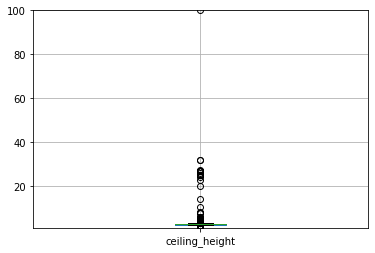

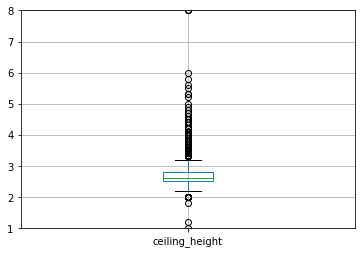

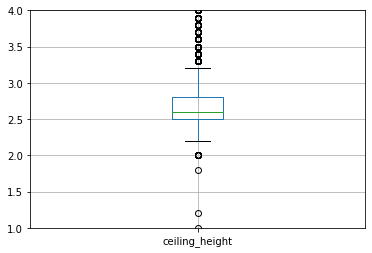

In [13]:
#создадим новую переменную и присвоим ей все данные таблицы ceiling_height и очистим от пропущенных значений
ceiling_height_data = data.loc[:, ['ceiling_height']].dropna()  

#построим boxplot("ящик с усами") для визуализации данных, определим редкие и выбивающиеся значения
ceiling_height_data.boxplot(column='ceiling_height')
plt.ylim(min(ceiling_height_data['ceiling_height'])\
         , max(ceiling_height_data['ceiling_height']))
plt.show()
ceiling_height_data.boxplot(column='ceiling_height')
plt.ylim(1, 8)
plt.show()
ceiling_height_data.boxplot(column='ceiling_height')
plt.ylim(1, 4)
plt.show()

По boxplot видно, что основная часть данных в диапазоне размаха от 2.2 до 3.2 м. Часть данных есть за границей в диапазоне от 3.2 до 5 м. Скорректируем значения от 22.6 до 32 метров, после чего посмотрим количество значений меннее 2.2 метра и более 5 метров.

In [14]:
ceiling_height_data.loc[(ceiling_height_data['ceiling_height'] > 22)\
                        & (ceiling_height_data['ceiling_height'] < 32)\
                        , 'ceiling_height'] = ceiling_height_data['ceiling_height'] / 10
print('Количество данных высоты потолка менее 2.2 метра и более 5 метров:'\
      , len(ceiling_height_data.query('(ceiling_height < 2.2) | (ceiling_height > 5)')))

Количество данных высоты потолка менее 2.2 метра и более 5 метров: 31


Небольшое количество аномальных данных стоит их убрать в общих данных data. Исправим значения в data['ceiling_height'] и заполним пропуски медианным значением

In [15]:
#изменим значения которые скорее всего были внесены неправильно
data.loc[(data['ceiling_height'] > 22) & (data['ceiling_height'] < 32)\
         , 'ceiling_height'] = data['ceiling_height'] / 10  

#заполним пропущенные значения
data['ceiling_height'] = data['ceiling_height']\
                              .fillna(data.groupby('locality_name')['ceiling_height']\
                              .transform('median'))

#удалим значения менее 2.2 метра и более 5 метров
data = data.query('(ceiling_height <= 5) & (ceiling_height >= 2.2)')
data['ceiling_height'] = data['ceiling_height']\
                              .fillna(data.groupby('locality_name')['ceiling_height']\
                              .transform('median'))
#убедимся в заполнении пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1844
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2198
balcony                     0
locality_name               0
airports_nearest         5427
cityCenters_nearest      5404
parks_around3000            0
parks_nearest           15451
ponds_around3000            0
ponds_nearest           14438
days_exposition             0
dtype: int64

Рассмотрим столбцы living_area и kitchen_area

In [16]:
#для определения и заполнения пропущенных значений living_area и kitchen_area следует рассмотреть зависимость данных
#создадим новую переменную данные о недвижимости по основным помещениям и общей площади
apartment_data = data.loc[:, ['living_area', 'kitchen_area', 'total_area', 'rooms']]
#следует рассмотреть зависимость между данными, но для этого предварительно очистим пропуски для более точных утверждений
apartment_data = apartment_data.dropna(subset=['living_area', 'kitchen_area'])
display(apartment_data.describe())  #выведем и изучим числовые характеристики

,living_area,kitchen_area,total_area,rooms
count,20847.000000,20847.000000,20847.000000,20847.000000
mean,34.642266,10.516426,60.536783,2.096273
std,21.899034,5.837809,34.443107,1.065309
min,2.000000,1.300000,14.000000,1.000000
25%,18.800000,7.000000,40.500000,1.000000
50%,30.100000,9.000000,52.200000,2.000000
75%,42.600000,12.000000,70.000000,3.000000
max,409.700000,112.000000,900.000000,19.000000


Следует посмотреть зависимость значений между собой. Построим диаграмму рассеивания

<AxesSubplot:xlabel='rooms', ylabel='living_area'>

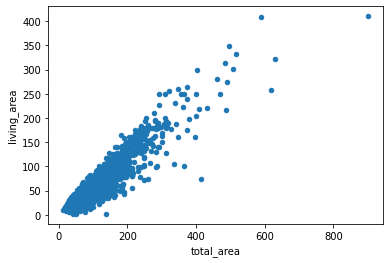

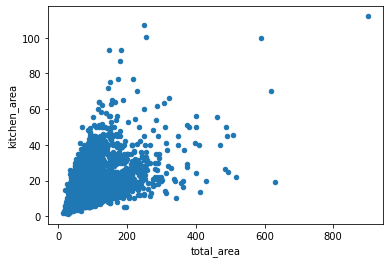

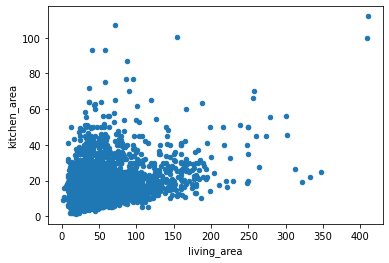

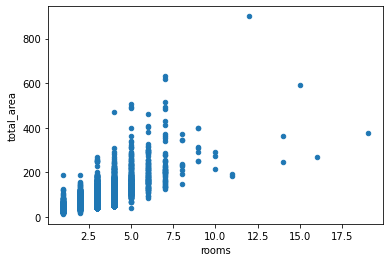

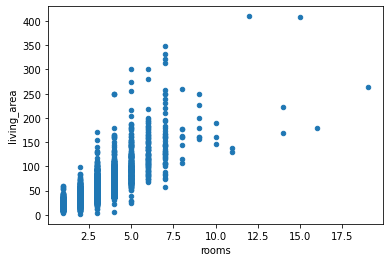

In [17]:
apartment_data.plot(x='total_area', y='living_area', kind='scatter')
apartment_data.plot(x='total_area', y='kitchen_area', kind='scatter')
apartment_data.plot(x='living_area', y='kitchen_area', kind='scatter')
apartment_data.plot(x='rooms', y='total_area', kind='scatter')
apartment_data.plot(x='rooms', y='living_area', kind='scatter')

In [18]:
#определим коэффициент корреляции, для точного определения как один показатель влияет на другой
print('Корреляция жилой площади и общей площади:', apartment_data['living_area'].corr(apartment_data['total_area']).round(2))
print('Корреляция количества комнат и жилой площади:', apartment_data['rooms'].corr(apartment_data['living_area']).round(2))
print('Корреляция кухни и общей площади:', apartment_data['total_area'].corr(apartment_data['kitchen_area']).round(2))
print('Корреляция количества комнат и площади кухни:', apartment_data['rooms'].corr(apartment_data['kitchen_area']).round(2))
print('Корреляция кухни и жилой площади:', apartment_data['living_area'].corr(apartment_data['kitchen_area']).round(2))
print('Корреляция количества комнат и общей площади:', apartment_data['rooms'].corr(apartment_data['total_area']).round(2))

Корреляция жилой площади и общей площади: 0.94
Корреляция количества комнат и жилой площади: 0.85
Корреляция кухни и общей площади: 0.61
Корреляция количества комнат и площади кухни: 0.27
Корреляция кухни и жилой площади: 0.43
Корреляция количества комнат и общей площади: 0.77


По положительной уверенной корреляции видим, что есть зависимость между жилой площадью и общей площадью, а также зависимость между кухней и жилой площадью.

In [19]:
#в следствии зависимости параметров между собой заполним пропущенные значения как медианное значение отношений параметров умноженное на общую площадь
data['koef_living_area'] = apartment_data['living_area'] / apartment_data['total_area']  #коэфициент жилой площади и обшей площади
data['koef_kitchen_area'] = apartment_data['kitchen_area'] / apartment_data['total_area']  #коэфициент площади кухни и обшей площади
data['koef_living_area'] = data['koef_living_area']\
                                .fillna(data.groupby('rooms')['koef_living_area']
                               .transform('median'))  #заполнили пропущенные коэфициенты
data['koef_kitchen_area'] = data['koef_kitchen_area']\
                                .fillna(data.groupby('rooms')['koef_kitchen_area']\
                                .transform('median'))  #заполнили пропущенные коэфициенты
data['living_area'] = data['living_area'].fillna(data['koef_living_area'] * data['total_area']).round(2)  #заполнили пропущенные значения
data['kitchen_area'] = data['kitchen_area'].fillna(data['koef_kitchen_area'] * data['total_area']).round(2)  #заполнили пропущенные значения

Пропуски еще остались возможно не хватило данных для заполнения, убедимся в одновременном пропуске значений в обоих столбцах

In [20]:
display(data.loc[data['kitchen_area'].isnull() & data['living_area'].isnull()])  #убедимся, нет ли пропущенных значений по двум параметрам

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,koef_living_area,koef_kitchen_area
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,2.6,10,NaN,7,False,True,False,NaN,0,поселок Шушары,NaN,NaN,0,NaN,0,NaN,29,NaN,NaN
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,2.7,18,NaN,8,False,False,True,NaN,1,поселок Мурино,NaN,NaN,0,NaN,0,NaN,45,NaN,NaN
3147,7,2170000.0,31.0,2017-12-30T00:00:00,0,2.6,12,NaN,12,False,True,False,NaN,0,Тосно,NaN,NaN,0,NaN,0,NaN,198,NaN,NaN
3874,13,1700000.0,21.4,2015-02-11T00:00:00,0,2.7,3,NaN,2,False,True,False,NaN,0,Всеволожск,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN
5749,20,3590000.0,25.0,2017-08-30T00:00:00,0,2.8,35,NaN,26,False,False,True,NaN,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,198,NaN,NaN
7818,11,3300000.0,27.3,2018-04-06T00:00:00,0,2.7,20,NaN,9,False,False,True,NaN,2,Санкт-Петербург,15990.0,13853.0,0,NaN,1,584.0,31,NaN,NaN
8454,7,2250000.0,19.0,2019-03-12T00:00:00,0,3.0,6,NaN,2,False,True,False,NaN,0,Санкт-Петербург,12430.0,7316.0,1,238.0,3,374.0,44,NaN,NaN
18028,11,3500000.0,31.0,2019-04-17T00:00:00,0,2.7,25,NaN,2,False,True,False,NaN,0,Санкт-Петербург,21460.0,16788.0,0,NaN,1,170.0,0,NaN,NaN
19392,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.6,7,NaN,6,False,False,True,NaN,0,Санкт-Петербург,25257.0,6060.0,1,761.0,1,584.0,90,NaN,NaN
23554,15,3350000.0,26.0,2018-09-07T00:00:00,0,2.7,19,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31,NaN,NaN


In [21]:
#в 8 строках оказались пропуски по двум параметрам, удалим их
data = data.dropna(subset=['living_area'])

#по оставшимся пропускам столбца citchen_area заполним значением 0 с учетом, 
#что это может быть студия и будем отталкиваться от количества комнат 0, все остальное уберем
data.loc[(data['studio'] == True) & (data['kitchen_area'].isnull())\
         & (data['rooms'] == 0), 'kitchen_area'] = data['kitchen_area'].fillna(0)
data = data.dropna(subset=['kitchen_area'])

#удалим столбцы с коэфициентами которые нужны были для заполнения пропущенных значений
data.drop(['koef_kitchen_area', 'koef_living_area'], axis='columns', inplace = True)

In [22]:
#после внесенных пропущенных значений посмотрим есть ли несоответсвие с действительностью
#сравним сумму площади жилой и кухни с общей площадью
print('Количество помещений, где сумма площадей кухни и жилой площади превышает общую:'\
      , data.query('(kitchen_area + living_area) > total_area').shape[0])

Количество помещений, где сумма площадей кухни и жилой площади превышает общую: 118


In [23]:
#удалим несоответсвующему данному критерию строки
data = data.query('(kitchen_area + living_area) < total_area')

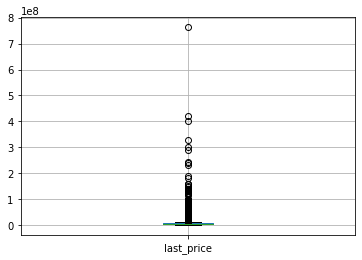

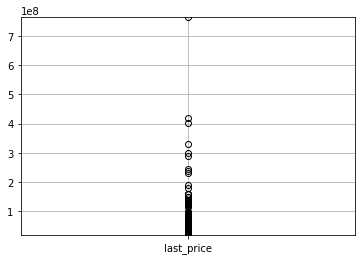

In [24]:
#рассмотрим таблицу last_price
data['last_price'].describe()
data.boxplot(column='last_price')
plt.show()
data.boxplot(column='last_price')
plt.ylim(20000000, max(data['last_price']))
plt.show()

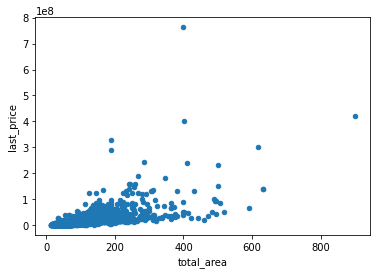

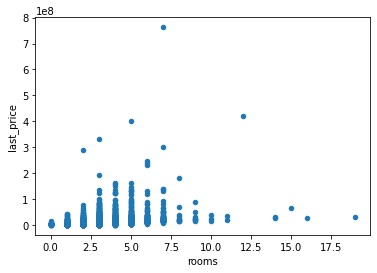

12190.0


In [25]:
#есть выброс минимальное значение 12.190 и максимальное 763.000.000, более точно следует посмотреть на точечной диаграмме рассеивания
data.plot(x='total_area', y='last_price', kind='scatter')
plt.show()
data.plot(x='rooms', y='last_price', kind='scatter')
plt.show()
print(min(data['last_price']))

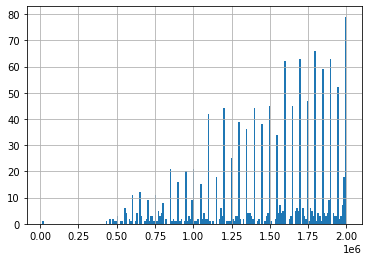

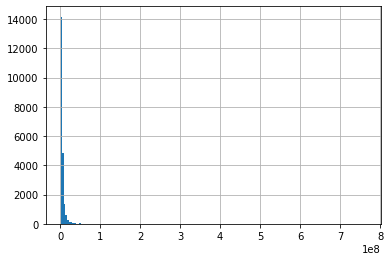

In [26]:
#построим гистограмму в диапазоне минимального значения и 2.000.000
data['last_price'].hist(bins=200, range=(min(data['last_price']), 2000000))
plt.show()
#построим гистограмму в диапазоне 200.000.000 до максимального значения
data['last_price'].hist(bins=200, range=(2000000, max(data['last_price'])))
plt.show()

In [27]:
#удалим все значения меньше 450.000 и больше 200.000.000
data = data.query('last_price >= 450000')

In [28]:
#рассмотрим таблицу floors_total
data['floors_total'].describe()

count    23230.000000
mean        10.675032
std          6.574757
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

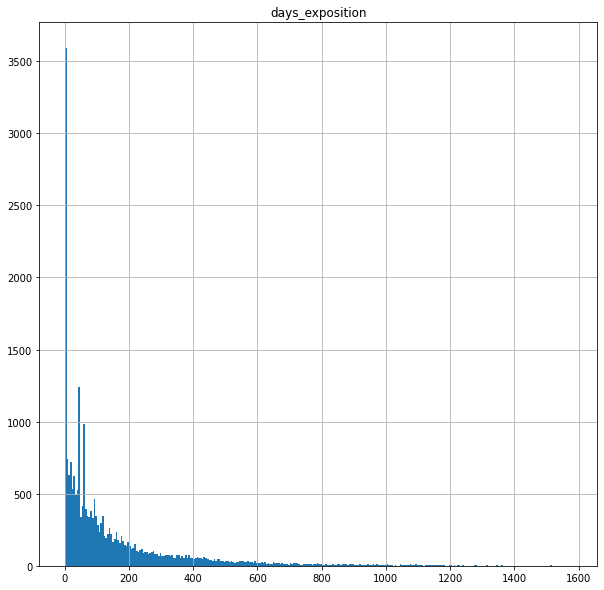

In [29]:
#рассмотрим столбец days_exposition
data['days_exposition'].describe()
data['days_exposition'].hist(bins=300, figsize=(10, 10))
plt.title('days_exposition')
plt.show()

In [30]:
#есть показатели аномально долгой продажи более 800 дней
#уберем данные количесвто дней которых более 800
data = data.query('days_exposition < 800')

In [31]:
#есть выделяющиеся и системно повторяющиеся пики на 7, 30, 45, 60 и 90 дню.
#возможно данные объявления ставили на определенный срок на неделю, месяц, 45 дней, 2 месяца или 3 месяца
#по истечению данного срока объявление автоматически снималось с публикации 
data = data.query('days_exposition < 800')

### Посчитаем и добавим в таблицу новые столбцы

In [32]:
#посчитаем и добавим в новую таблицу цену за 1 м2
data['price_per_meter'] = (data['last_price'] / data['total_area']).round(0)

#посчитаем и добавим в новую таблицу день недели, месяци и год публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data['day_of_the_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#создадим функцию для категоризации по этажам
def category_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
#применим функцию к нашим данным
data['floor_type'] = data.apply(category_floor, axis=1)
data['cityCenters_nearest_in_km'] = (data['cityCenters_nearest'] / 1000).round(0)

### Проведем исследовательский анализ данных

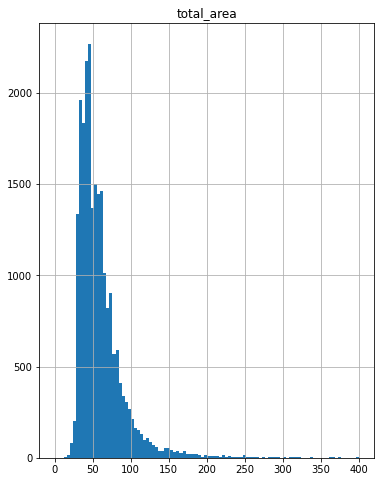

In [33]:
#построим гистограмму по общей площади
data['total_area'].hist(bins=100, range=(0, 400), figsize=(6, 8))
plt.title('total_area')
plt.show()

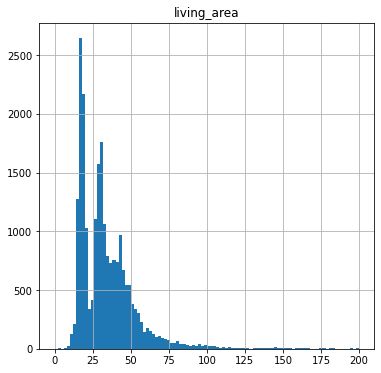

In [34]:
#построим гистограмму по жилой площади
data['living_area'].hist(bins=100, range=(0, 200), figsize=(6, 6))
plt.title('living_area')
plt.show()

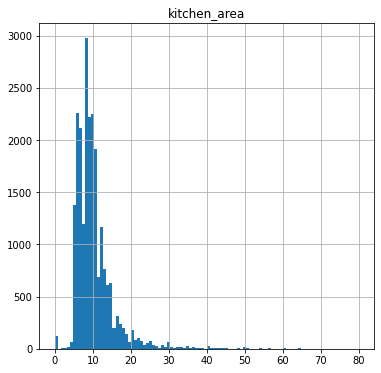

In [35]:
#построим гистограмму по площади кухни
data['kitchen_area'].hist(bins=100, range=(0, 80), figsize=(6, 6))
plt.title('kitchen_area')
plt.show()

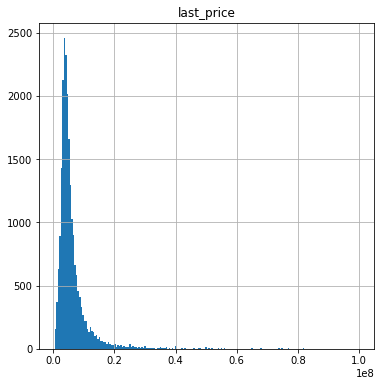

In [36]:
#построим гистограмму по цене объекта
data['last_price'].hist(bins=200, range=(450000, 100000000), figsize=(6, 6))
plt.title('last_price')
plt.show()

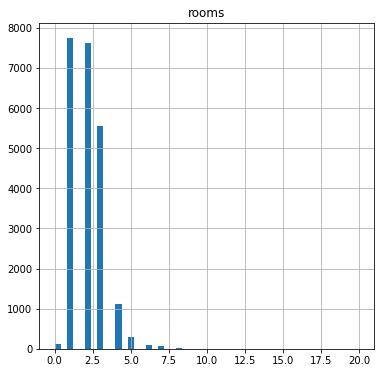

In [37]:
#построим гистограмму по количеству комнат
data['rooms'].hist(bins=50, range=(0, 20), figsize=(6, 6))
plt.title('rooms')
plt.show()

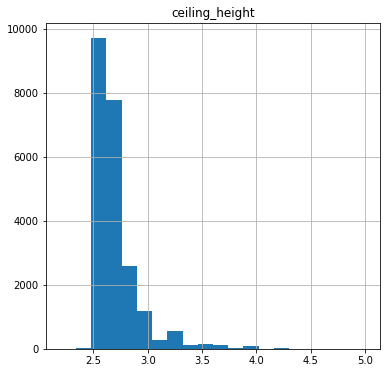

In [38]:
#построим гистограмму по высоте потолка
data['ceiling_height'].hist(bins=20, figsize=(6, 6))
plt.title('ceiling_height')
plt.show()

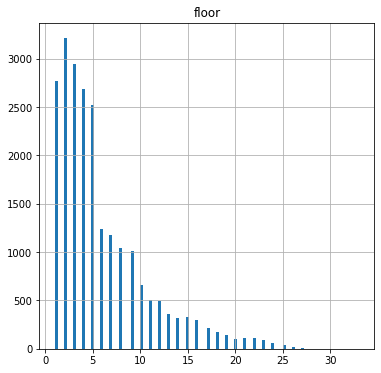

In [39]:
#построим гистограмму по этажу
data['floor'].hist(bins=100, figsize=(6, 6))
plt.title('floor')
plt.show()

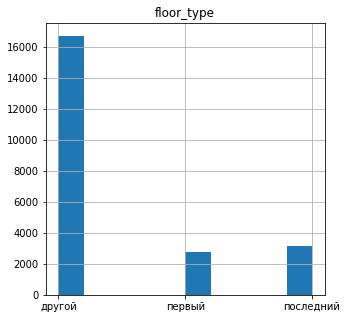

In [40]:
#построим гистограмму по типу этажа 
data['floor_type'].hist(bins=10, figsize=(5, 5))
plt.title('floor_type')
plt.show()

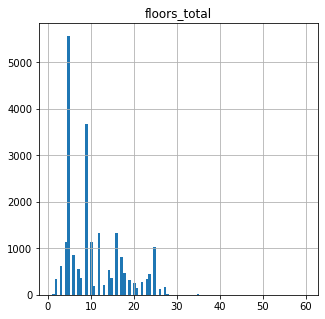

In [41]:
#построим гистограмму по общему количеству этажей в доме
data['floors_total'].hist(bins=100, figsize=(5, 5))
plt.title('floors_total')
plt.show()

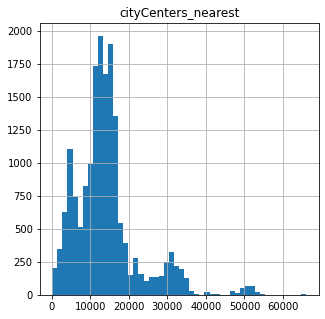

In [42]:
#построим гистограмму расстояние до центра города в метрах
data['cityCenters_nearest'].hist(bins=50, figsize=(5, 5))
plt.title('cityCenters_nearest')
plt.show()

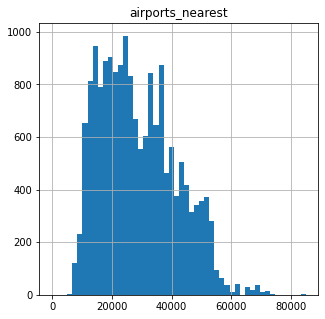

In [43]:
#построим гистограмму расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins=50, figsize=(5, 5))
plt.title('airports_nearest')
plt.show()

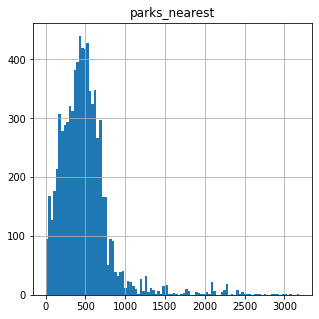

In [44]:
#построим гистограмму расстояние до ближайшего парка
data['parks_nearest'].hist(bins=100, figsize=(5, 5))
plt.title('parks_nearest')
plt.show()

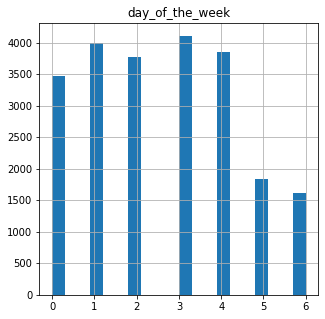

In [45]:
#построим гистограмму день публикации объявления
data['day_of_the_week'].hist(bins=20, figsize=(5, 5))
plt.title('day_of_the_week')
plt.show()

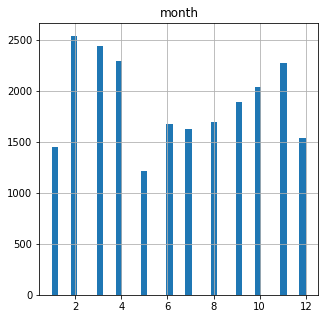

In [46]:
#построим гистограмму месяц публикации объявления
data['month'].hist(bins=40, figsize=(5, 5))
plt.title('month')
plt.show()

По рассмотренным графикам можно сказать, что в основном рассматривают квартиры площадью от 30 до 75 м2, по количеству комнат однокомнатные, двухкомнатные и трехкомнатные квартиры, с высотой потолка от 2,5 до 2,6 метров, стараются выбрать не первый и не последний этаж, а общее количество этаже было не более 5. Основная масса недвижимости представлена 5 и 9 этажными домами. Заметны дни публикации объявлений, обычно это будни, но есть и выходные но их гораздо меньше. Увеличенный спрос с февраля по апрель месяц.

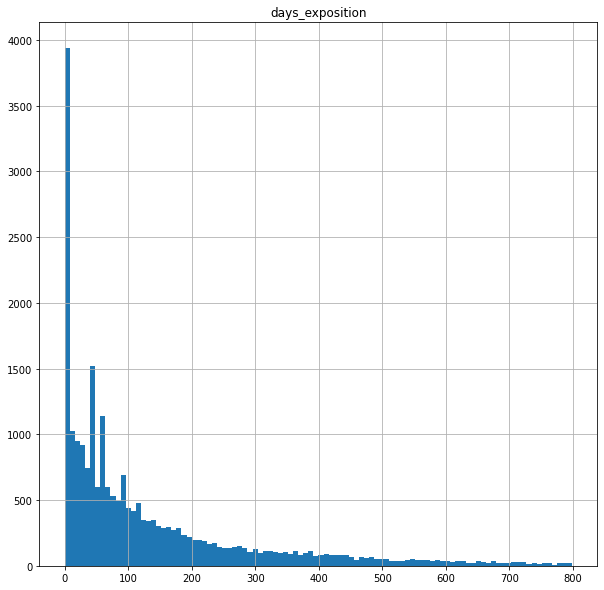

Медианное значение по количеству дней продажи квартиры: 70.0
Среднее значение по количеству дней продажи квартиры: 135.0


count    22644.000000
mean       135.002826
std        162.739751
min          0.000000
25%         21.000000
50%         70.000000
75%        184.000000
max        799.000000
Name: days_exposition, dtype: float64

In [47]:
#рассмотрим ,как быстро продавались квартиры, построим гистограмму по столбцу days_exposition
data['days_exposition'].hist(bins=100, figsize=(10, 10))
plt.title('days_exposition')
plt.show()
#вычислим среднее значение и медиану
print('Медианное значение по количеству дней продажи квартиры:', data['days_exposition'].median())
print('Среднее значение по количеству дней продажи квартиры:', data['days_exposition'].mean().round(0))
data['days_exposition'].describe()

Обычно продажа недвижимости занимает чуть больше 4 месяцев - 135 дней. Можно считать быстрой продажей недвижимости количество дней которых менее 70 дней. Необычно долгими можно считать количество дней более 184.

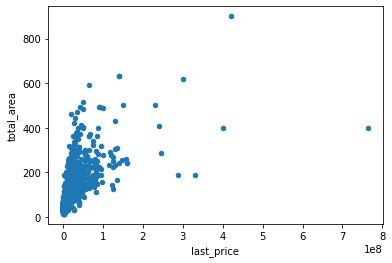

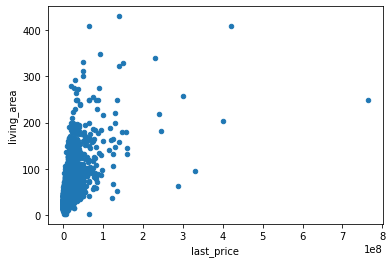

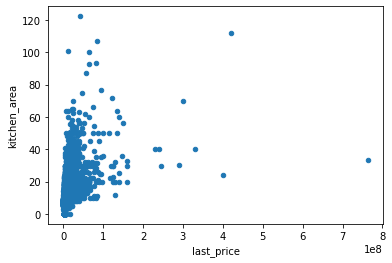

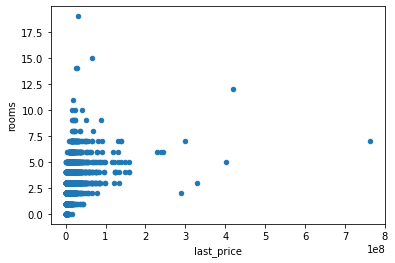

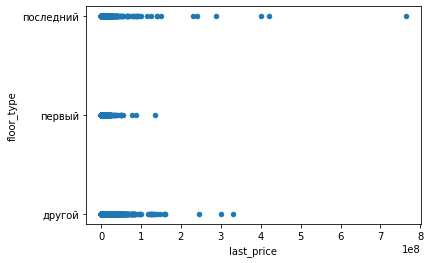

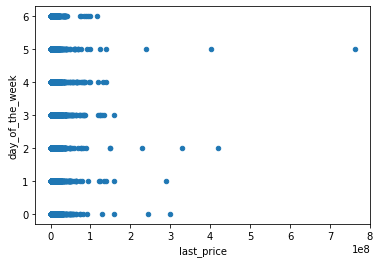

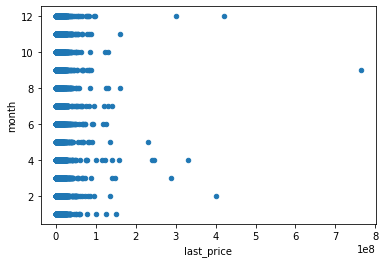

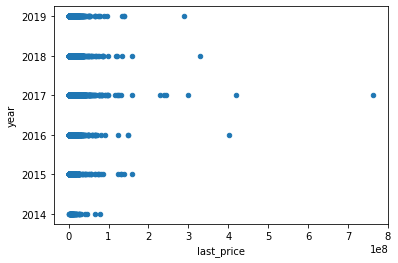

In [48]:
#изучим факторы влияющие на стоимость недвижимости
data.plot(x='last_price', y='total_area', kind='scatter')
plt.show()
data.plot(x='last_price', y='living_area', kind='scatter')
plt.show()
data.plot(x='last_price', y='kitchen_area', kind='scatter')
plt.show()
data.plot(x='last_price', y='rooms', kind='scatter')
plt.show()
data.plot(x='last_price', y='floor_type', kind='scatter')
plt.show()
data.plot(x='last_price', y='day_of_the_week', kind='scatter')
plt.show()
data.plot(x='last_price', y='month', kind='scatter')
plt.show()
data.plot(x='last_price', y='year', kind='scatter')
plt.show()

In [49]:
print('Корреляция цены и общей площади:', data['last_price'].corr(data['total_area']).round(2))

print('Корреляция цены и жилой площади:', data['last_price'].corr(data['living_area']).round(2))

print('Корреляция цены и площади кухни:', data['last_price'].corr(data['kitchen_area']).round(2))

print('Корреляция цены и количества комнат:', data['last_price'].corr(data['rooms']).round(2))

Корреляция цены и общей площади: 0.65
Корреляция цены и жилой площади: 0.58
Корреляция цены и площади кухни: 0.47
Корреляция цены и количества комнат: 0.36


На стоимость объекта в основном влияет площадь и количество комнат. Также на стоимость влияет на каком этаже находится недвижимость. Другие рассматриваемые параметры влияют в меньшей степени.

In [50]:
#найдем среднюю цену одного м2 в 10 населенных пунктах с наибольшим числом объявлений
price_top10_locality_name = data.groupby('locality_name').agg({'price_per_meter': ['count', 'mean']}).round(0)
price_top10_locality_name.columns = ['count', 'mean']
price_top10_locality_name = price_top10_locality_name.sort_values(by='count', ascending=False)
display(price_top10_locality_name.head(10))

,count,mean
locality_name,,
Санкт-Петербург,15067,114323.0
поселок Мурино,522,85418.0
поселок Шушары,429,78415.0
Всеволожск,379,68699.0
Пушкин,355,103084.0
Колпино,333,75425.0
поселок Парголово,319,90092.0
Гатчина,293,68769.0
деревня Кудрово,274,92327.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week,month,year,floor_type,cityCenters_nearest_in_km
3,0,64900000.0,159.00,2015-07-24,3,2.7,14,100.44,9,False,False,False,20.43,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.0,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,другой,8.0
35,6,15500000.0,149.00,2017-06-26,5,2.7,5,104.00,4,False,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0,NaN,1,779.0,644,104027.0,0,6,2017,другой,4.0
51,7,45000000.0,161.00,2017-10-17,3,3.2,8,38.00,4,False,False,False,50.00,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,541,279503.0,1,10,2017,другой,7.0
52,20,11795000.0,136.00,2017-09-22,6,3.0,2,94.00,2,False,False,False,11.00,1,Санкт-Петербург,16510.0,6582.0,1,526.0,0,NaN,0,86728.0,4,9,2017,последний,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,10,5950000.0,56.00,2019-03-05,3,2.7,8,32.10,3,False,False,False,8.50,0,Санкт-Петербург,32139.0,9217.0,0,NaN,2,303.0,0,106250.0,1,3,2019,другой,9.0
23681,13,5250000.0,43.00,2018-05-11,2,2.5,5,29.00,2,False,False,False,6.00,0,Санкт-Петербург,28323.0,7262.0,1,497.0,2,660.0,80,122093.0,4,5,2018,другой,7.0
23690,3,5500000.0,52.00,2018-07-19,2,2.7,5,31.00,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15,105769.0,3,7,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.8,25,40.30,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519,129904.0,3,10,2016,другой,4.0


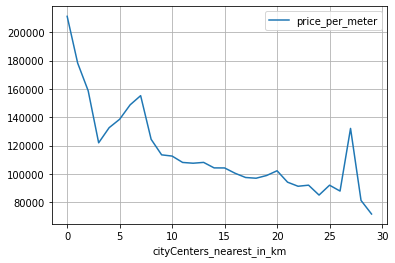

In [51]:
sp_mean_price_for_km = data.query('locality_name == "Санкт-Петербург"')
sp_mean_price_for_km_mean = sp_mean_price_for_km.groupby('cityCenters_nearest_in_km').agg({'price_per_meter': 'mean'}).round(0)
display(sp_mean_price_for_km.query('2 < cityCenters_nearest_in_km < 10'))
sp_mean_price_for_km_mean.plot()
plt.grid(b=True)
plt.show()

На цену одного квадратного метра жилья сильно влияет отдаленность от центра города. Если сравнивать промежуток от 10 до 25 км разница в стоимости за квадратный метр изменился на 1 пункт, далее каждый километр сильнее влияет на стоимость недвижимости.

### Общий вывод

В ходе выполнения проекта изучили общую информацию по предоставленному датафрейму, рассмотрели пропущенные значения и постарались заполнить пропуски там, где это было возможно. Основная масса квартир - это квартиры общей площадью от 30 до 75 м2, по количеству комнат однокомнатные, двухкомнатные и трехкомнатные, с высотой потолка от 2,5 до 2,7 метров. Основная масса недвижимости составляет 5 и 9 этажные дома. Влияет и тип этажа, отдают предпочтение не первому и не последнему этажу, а другому.  В основном объявления публикуются по будням. При исследовании данных убедились, что на стоимость объекта в основном влияет площадь и количество комнат. Также на стоимость влияет на каком этаже находится недвижимость. Стоимость за квадратный метр недвижимости зависит от населенного пункта. Проведя анализ среди 10 населенных пунктов с наибольшим числом объявлений выяснили, что квадратный метр жилья в Выборге равен 58.505, а в Санкт-Петербурге равен 114.323. Рассмотрели влияние отдаленности от центра города на стоимость и выяснили, что с каждым км стоимость за квадратный метр возрастает.